https://www.tensorflow.org/tutorials/keras/basic_classification

In [5]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.utils import shuffle
import os
from os.path import join
import argparse
import random
import pickle
import cv2
import os, fnmatch

# import zipfilefrom sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers.core import Dense
# from keras.optimizers import SGD
# from imutils import paths

%matplotlib inline


print(tf.__version__)

1.13.1


In [6]:
# # Creates a graph.
# c = []
# with tf.device(get_available_gpus()[-1]):
#     a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
#     b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
#     c.append(tf.matmul(a, b))
# with tf.device('/cpu:0'):
#     sum = tf.add_n(c)
# # Creates a session with log_device_placement set to True.
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# # Runs the op.
# print(sess.run(sum))


In [7]:
Labels = []
def find_files(directory, pattern):
   for root, dirs, files in os.walk(directory):
       for basename in files:
           if fnmatch.fnmatch(basename, pattern):
               filename = os.path.join(root, basename)
               yield filename


for filename in find_files('/data/home/maj/notebooks/w210-final-project/MAJ/Frame_Labels/PSPI/', '*.txt'):
   Labels.append(filename)

Labels_df = pd.DataFrame(data=Labels)

Labels_df.shape


(48398, 1)

In [9]:
# #Trying to figure out if GPU is working and how it works.
# #I am not able to see the logs...it's a bug
# #https://www.tensorflow.org/guide/using_gpu
# tf.logging.set_verbosity(tf.logging.INFO)

# # Creates a graph.
# c = []
# for d in get_available_gpus():
#     with tf.device(d):
#         a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
#         b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
#         c.append(tf.matmul(a, b))
# with tf.device('/cpu:0'):
#     sum = tf.add_n(c)
# # Creates a session with log_device_placement set to True.
# sess = tf.Session(config=tf.ConfigProto(
#       allow_soft_placement=True, log_device_placement=True))
# # Runs the op.
# print(sess.run(sum))

# tf.logging.info('Stored priming notes: %s', d) 


In [11]:
# print(Labels_df[0:1])

In [12]:
images_path = []
def find_files(directory, pattern):
   for root, dirs, files in os.walk(directory):
       for basename in files:
           if fnmatch.fnmatch(basename, pattern):
               filename = os.path.join(root, basename)
               yield filename


for filename in find_files('/data/home/maj/notebooks/w210-final-project/MAJ', '*.png'):
   images_path.append(filename)


images_path_df = pd.DataFrame(data=images_path)

images_path_df.shape

(48398, 1)

In [13]:
images = []
sequences = []
image_sequences = []

pspi_scores = []
opr_scores = []

aff_scores = []
sen_scores = []
vas_scores = []

for subject_id in os.listdir('Images'):
    if subject_id != '.DS_Store':
        for sequence_id in os.listdir(join('Images', subject_id)):
            if sequence_id != '.DS_Store':
                sequences.append(sequence_id)
                for image in os.listdir(join('Images', subject_id, sequence_id)):
                    if image != '.DS_Store':
                        images.append(image.split('.')[0])
                        image_sequences.append(sequence_id)
                for pspi_file in os.listdir(join('Frame_Labels', 'PSPI', subject_id, sequence_id)):
                    with open(join('Frame_Labels', 'PSPI', subject_id, sequence_id, pspi_file), 'r') as f_in:
                        pspi_scores.append(float(f_in.read().strip()))
        for aff_file in os.listdir(join('Sequence_Labels', 'AFF', subject_id)):
            with open(join('Sequence_Labels', 'AFF', subject_id, aff_file), 'r') as f_in:
                aff_scores.append(float(f_in.read().strip()))
        for opr_file in os.listdir(join('Sequence_Labels', 'OPR', subject_id)):
            with open(join('Sequence_Labels', 'OPR', subject_id, opr_file), 'r') as f_in:
                opr_scores.append(float(f_in.read().strip()))
        for sen_file in os.listdir(join('Sequence_Labels', 'SEN', subject_id)):
            with open(join('Sequence_Labels', 'SEN', subject_id, sen_file), 'r') as f_in:
                sen_scores.append(float(f_in.read().strip()))
        for vas_file in os.listdir(join('Sequence_Labels', 'VAS', subject_id)):
            with open(join('Sequence_Labels', 'VAS', subject_id, vas_file), 'r') as f_in:
                vas_scores.append(float(f_in.read().strip()))

image_data = {'image': images,
              'image_sequence': image_sequences,
              'pspi_score': pspi_scores}

sequence_data = {'sequence': sequences, 
                 'aff_score': aff_scores, 
                 'opr_score': opr_scores, 
                 'sen_score': sen_scores,
                 'vas_score': vas_scores}

image_df = pd.DataFrame(data=image_data)
sequence_df = pd.DataFrame(data=sequence_data)


In [14]:
print ('Examples of image identifiers:\n{}\n'.format(images[:10]))
print ('Examples of sequence identifiers:\n{}\n'.format(sequences[:10]))
print ('Examples of PSPI scores:\n{}\n'.format(pspi_scores[:10]))
print ('Examples of AFF scores:\n{}\n'.format(aff_scores[:10]))
print ('Examples of OPR scores:\n{}\n'.format(opr_scores[:10]))
print ('Examples of SEN scores:\n{}\n'.format(sen_scores[:10]))
print ('Examples of VAS scores:\n{}\n'.format(vas_scores[:10]))

Examples of image identifiers:
['fn059t2afunaff048', 'fn059t2afunaff405', 'fn059t2afunaff119', 'fn059t2afunaff163', 'fn059t2afunaff003', 'fn059t2afunaff005', 'fn059t2afunaff022', 'fn059t2afunaff176', 'fn059t2afunaff287', 'fn059t2afunaff257']

Examples of sequence identifiers:
['fn059t2afunaff', 'fn059t2aiaff', 'jh043t2afunaff', 'jh043t2afaff', 'jh043t2aeunaff', 'jh043t2aiunaff', 'jh043t1afaff', 'jh043t2aeaff', 'jh043t2aaunaff', 'jh043t1aeaff']

Examples of PSPI scores:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Examples of AFF scores:
[7.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 13.0, 5.0]

Examples of OPR scores:
[4.0, 3.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0]

Examples of SEN scores:
[8.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 12.0, 5.0]

Examples of VAS scores:
[6.0, 1.0, 2.0, 0.0, 0.0, 4.0, 0.0, 1.0, 6.0, 3.0]



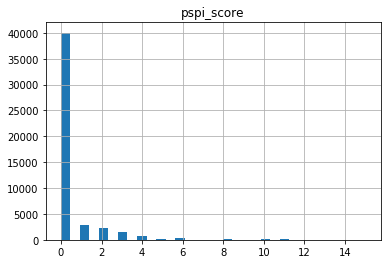

In [15]:
df2 = pd.DataFrame({
         'pspi_score': pspi_scores
         }, index=images)
hist = df2.hist(bins=32)

In [16]:
image_df

,image,image_sequence,pspi_score
0,fn059t2afunaff048,fn059t2afunaff,0.0
1,fn059t2afunaff405,fn059t2afunaff,0.0
2,fn059t2afunaff119,fn059t2afunaff,0.0
3,fn059t2afunaff163,fn059t2afunaff,0.0
4,fn059t2afunaff003,fn059t2afunaff,0.0
5,fn059t2afunaff005,fn059t2afunaff,0.0
6,fn059t2afunaff022,fn059t2afunaff,0.0
7,fn059t2afunaff176,fn059t2afunaff,0.0
8,fn059t2afunaff287,fn059t2afunaff,0.0
9,fn059t2afunaff257,fn059t2afunaff,0.0


In [17]:
pain_data = image_df[['image','pspi_score']]

In [18]:
pain_data


,image,pspi_score
0,fn059t2afunaff048,0.0
1,fn059t2afunaff405,0.0
2,fn059t2afunaff119,0.0
3,fn059t2afunaff163,0.0
4,fn059t2afunaff003,0.0
5,fn059t2afunaff005,0.0
6,fn059t2afunaff022,0.0
7,fn059t2afunaff176,0.0
8,fn059t2afunaff287,0.0
9,fn059t2afunaff257,0.0


In [19]:
#extracting the .png file name from the first dataset and joining with the image & PSPI score dataset
images_path_df

#renaming dataframe column to image path
images_path_df.columns = ['image_path']

# new temp data frame with split value columns 
temp = images_path_df["image_path"].str.split("/", n = 10, expand = True) 
temp.columns = ['zero','one','two','three','four','five','six','seven', 'eight','nine', 'ten']


# Create new temp dataframe that has image name without .png to later do a merge
temp2 = temp["ten"].str.split(".", n = 1, expand = True) 
temp2.columns = ['image','ext']
temp2.drop(columns =["ext"], inplace = True) 

# print(temp2[:1])
# print(images_path_df[:1])

df_columns = pd.concat([images_path_df, temp2], axis =1)
print(df_columns[:1])

# #checking the size
# print('manip:', df_columns.shape)
# print('original:', pain_data.shape)

# #checking the header and first row for each data frame
# print(df_columns[:1])
# print(pain_data[:1])

#doing a merge on the .png value to ensure that the path will match the PSPI value
merged_inner = pd.merge(left=pain_data,right=df_columns, left_on='image', right_on='image')
# print('merged table: ', merged_inner.shape)
# print('New table header: ',merged_inner[:1])

#reordering columns
merged_inner= merged_inner [['image_path', 'image', 'pspi_score']]
merged_inner[:1]

#Final Dataset for pain dataset to by used in CNN
pain_data = merged_inner
print('\nFinal Dataset ready for CNN')

pain_data[:1]




                                          image_path              image
0  /data/home/maj/notebooks/w210-final-project/MA...  fn059t2afunaff048

Final Dataset ready for CNN


,image_path,image,pspi_score
0,/data/home/maj/notebooks/w210-final-project/MA...,fn059t2afunaff048,0.0


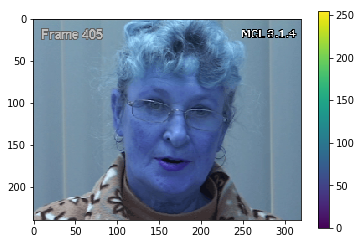

In [20]:
image = cv2.imread(pain_data['image_path'][1])
image = cv2.resize(image, (320, 240))

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

(240, 320, 3)


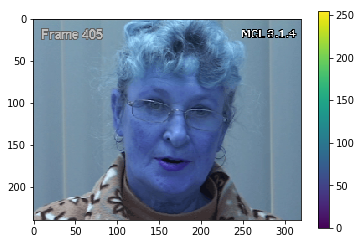

In [21]:
#when transforming to list we lose order. in the next step, we will make sure that we re-match label with path and picture
#by appending to data_pic & pic_path in each loop
list_pain = list(pain_data['image_path'])
list_pain[1]

list_pain = np.array(list_pain)

image = cv2.imread(list_pain[1])
image = cv2.resize(image, (320, 240))
print(image.shape)

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
# Shuffle Dataset
random.seed(42)
pain_data = shuffle(pain_data)

# initialize the data and labels


# initialize the data and labels
print("[INFO] loading images...")
data_pic = []
pic_path = []
labels = pain_data['pspi_score']

# loop over the input images
imagePath = list(pain_data['image_path'])

for imagePath in imagePath:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (320, 240))
    data_pic.append(image)
    pic_path.append(imagePath)
    
print("[INFO] Pictures loaded")

[INFO] loading images...
[INFO] Pictures loaded


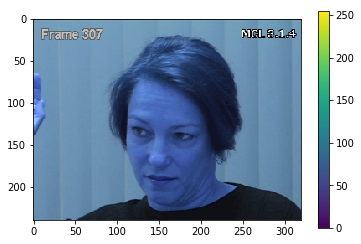

In [23]:
pic_path[0]
image2 = cv2.imread(pic_path[0])
image2 = cv2.resize(image2, (320, 240))

plt.figure()
plt.imshow(image2)
plt.colorbar()
plt.grid(False)
plt.show()


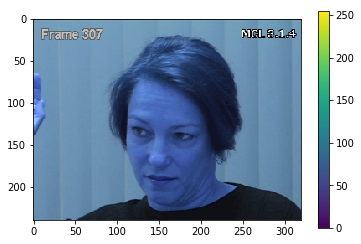

In [24]:
#we should get the same picture here to confirm that the path and picture are the same
plt.figure()
plt.imshow(data_pic[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
pic_path_df = pd.DataFrame(data=pic_path)

In [26]:
pic_path_df.columns = ['image_path']
pic_path_df['image_path'][0]


'/data/home/maj/notebooks/w210-final-project/MAJ/Images/124-dn124/dn124t1aeaff/dn124t1aeaff307.png'

In [27]:
pain_data['image_path'][0]

'/data/home/maj/notebooks/w210-final-project/MAJ/Images/059-fn059/fn059t2afunaff/fn059t2afunaff048.png'

In [28]:
#checking if merge worked based on output above
final_pain_data = pd.merge(left=pic_path_df,right=pain_data, on='image_path')
final_pain_data[:1]

,image_path,image,pspi_score
0,/data/home/maj/notebooks/w210-final-project/MA...,dn124t1aeaff307,0.0


In [29]:
#create final data label to match data pictures
data_label = final_pain_data.copy()
data_label.drop(columns =["image_path","image"], inplace = True) 
data_label.shape




(48398, 1)

In [32]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

['/device:GPU:0', '/device:GPU:1']

In [33]:
data_list = np.array(data_pic)

In [34]:
with tf.device(get_available_gpus()[-1]):   # Notice THIS
    data_pic = data_list
    data_pic = data_pic / 255.0
    data_pic.shape

In [24]:
#final Dataset is ready with two variables
# data_pic containing all pictures
# data_label containing all corresponding labels

In [35]:
#splitting pictures into train and test
#Original split is 33879 however testing for CNN MODEL as it's running out of resources
data_pic_train = data_pic[:33879]
print("train picture data: ", data_pic_train.shape)
data_pic_test = data_pic[33879:]
print("test picture data: ", data_pic_test.shape)

train picture data:  (33879, 240, 320, 3)
test picture data:  (14519, 240, 320, 3)


In [36]:
#splitting pictures into train and test
data_label_train = data_label[:33879]
print("train label data: ",data_label_train.shape)
data_label_test = data_label[33879:]
print("test label data: ",data_label_test.shape)

train label data:  (33879, 1)
test label data:  (14519, 1)


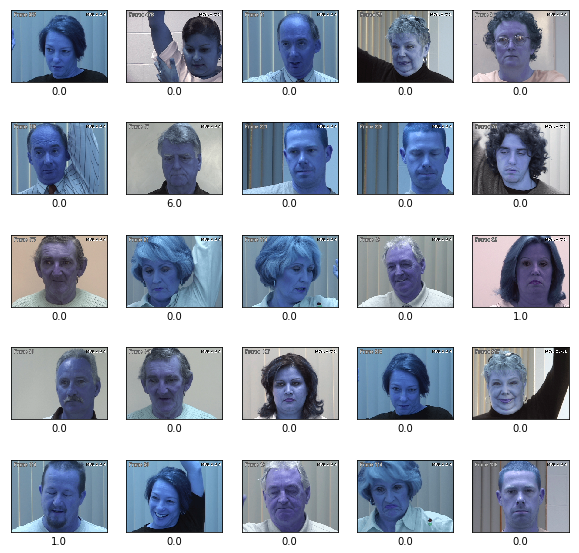

In [37]:
plt.figure(figsize=(10,10))
#original is range(25)
for i in range(25):
    #plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_pic_train[i], cmap=plt.cm.binary)
    plt.xlabel(data_label_train['pspi_score'][i])
plt.show()

In [38]:
#https://www.tensorflow.org/tutorials


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(240,320,3)),
  tf.keras.layers.Dense(12800, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(15, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [39]:
with tf.device(get_available_gpus()[-1]):    # Notice THIS
    model.fit(data_pic_train, data_label_train['pspi_score'], epochs=5)
    model.evaluate(data_pic_test, data_label_test)

ResourceExhaustedError: OOM when allocating tensor with shape[230400,12800] and type float on /job:localhost/replica:0/task:0/device:GPU:1 by allocator GPU_1_bfc
	 [[node training/Adam/zeros_4 (defined at <ipython-input-39-4f0a42172090>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'training/Adam/zeros_4', defined at:
  File "/anaconda/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/anaconda/envs/py36/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/anaconda/envs/py36/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/anaconda/envs/py36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-4f0a42172090>", line 2, in <module>
    model.fit(data_pic_train, data_label_train['pspi_score'], epochs=5)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 880, in fit
    validation_steps=validation_steps)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training_arrays.py", line 195, in model_iteration
    f = _make_execution_function(model, mode)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training_arrays.py", line 122, in _make_execution_function
    return model._make_execution_function(mode)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 1983, in _make_execution_function
    self._make_fit_function()
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 1926, in _make_fit_function
    '_fit_function', [self.total_loss] + metrics_tensors)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 1895, in _make_train_function_helper
    params=self._collected_trainable_weights, loss=self.total_loss)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/optimizers.py", line 501, in get_updates
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/optimizers.py", line 501, in <listcomp>
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/backend.py", line 1068, in zeros
    v = array_ops.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1817, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3367, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[230400,12800] and type float on /job:localhost/replica:0/task:0/device:GPU:1 by allocator GPU_1_bfc
	 [[node training/Adam/zeros_4 (defined at <ipython-input-39-4f0a42172090>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

